**Author** : V.Joan Aléonard<br>
**Last update** : 22 February 2020

# <font color=red><center>OLIST MARKETPLACE - CUSTOMERS SEGMENTATION</center></font>

**OLIST Store** is a Brazilian sales solution for online marketplaces.

As Data Scientist consultant for Olist, our mission is to provide Olist e-commerce teams with a **customer segmentation** that can be used on a daily basis for communication campaigns.

The objective of this notebook is to understand the **different profiles** of Olist customers through their **behaviour and personal data**.

Thus, we will provide the marketing team with:
- an actionable description of the segmentation and its underlying logic for optimal use;
- a proposal for maintenance contract, based on the analysis of the stability of the segments over time; 
- a code in compliance with the PEP8 convention in order to be usable by Olist.

At our disposal, Olist provides us with anonymised commercial database on Kaggle ([Link](https://www.kaggle.com/olistbr/brazilian-ecommerce)), containing information about customer details, order history, purchased products, payment details, satisfaction feedback, etc.

# <font color=green><center>Notebook for EXPLORATORY DATA ANALYSIS</center></font>

# <font color=salmon>PART 1 - Datasets overview</font>

We have been provide by Olist with 8 specific datasets, plus 1 CSV file including product categories translation from portugese to english.

In this part, we will look at the **general structure of all datasets**: shape, missing values, duplicates and data relationships.

## <font color=blue>1.1 - Loading, shape</font>

Let's import all libraries we will need then load the datasets to have a first look.

We've also created another CSV file called **REGIONS** to enrich/simplify the data: we'll go in depth at the related section.

**Side note** : In order to keep clarity of the notebook, we have created a custom module (***my_functions_p5***) which we will call when needed.

In [1]:
# For PEP8 compliance
%load_ext pycodestyle_magic
# %pycodestyle_on
# %pycodestyle_off

In [2]:
# -*- coding: uft-8 -*-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown
import scipy.stats as st
import time
import gc

# Custom module
from my_functions import *

%matplotlib inline
# %config IPCompleter.greedy=True

In [3]:
%%time
# Load datasets
customers = pd.read_csv('olist_customers_dataset.csv')
regions = pd.read_csv('brazil_region.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
translation = pd.read_csv('product_category_name_translation.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')

Wall time: 2.94 s


In [4]:
# Create datasets' dictionary
datasets = {'Customers': customers,
            'Geolocation': geolocation,
            'Region' : regions,
            'Items': items,
            'Payments': payments,
            'Reviews': reviews,
            'Orders': orders,
            'Products': products,
            'Translation': translation,
            'Sellers': sellers}

# Display datasets' shape and 2 first rows
for name, df in datasets.items():
    display(Markdown(f'**{name}** : {(list(df.shape))}'))
    display(df.head(3))

**Customers** : [99441, 5]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


**Geolocation** : [1000163, 5]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


**Region** : [27, 3]

,state_code,state_name,region
0,AC,acre,north
1,AL,alagoas,northEast
2,AP,amapa,north


**Items** : [112650, 7]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


**Payments** : [103886, 5]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


**Reviews** : [100000, 7]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


**Orders** : [99441, 8]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


**Products** : [32951, 9]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


**Translation** : [71, 2]

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


**Sellers** : [3095, 4]

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


## <font color=blue>1.2 - Missing value</font>

In [5]:
# Check missing values through all datasets
for name, df in datasets.items():
    col_name = df.columns[df.isnull().any()].tolist()
    missing = df.isnull().sum()
    if len(col_name) > 0:
        display(Markdown(f'**{name}**: {col_name}'))
        display(Markdown(f'{list(missing[missing > 0])}'))
        display(Markdown(f'---'))

**Reviews**: ['review_comment_title', 'review_comment_message']

[88285, 58247]

---

**Orders**: ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']

[160, 1783, 2965]

---

**Products**: ['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

[610, 610, 610, 610, 2, 2, 2, 2]

---

## <font color=blue>1.3 - Duplicates</font>

In [6]:
# Check duplicates through all datasets
for name, df in datasets.items():
    nb_duplicates = df.duplicated().sum()
    if nb_duplicates > 0:
        display(Markdown(f'---'))
        display(Markdown(f'**{name}** : **{nb_duplicates}** duplicated rows'))
        display(Markdown(f'---'))

---

**Geolocation** : **261831** duplicated rows

---

## <font color=blue>1.4 - Data types and Unique values</font>

In [7]:
# Visualize for each dataset : datatypes and unique values
dataframes = []
variables = []
datatypes = []
unique_values = []

for name, df in datasets.items():
    for col in df.columns:
        dataframes.append(name)
        variables.append(col)
        datatypes.append(df[col].dtype)
        unique_values.append(df[col].nunique())

summary = pd.DataFrame([dataframes, variables, datatypes, unique_values]).T
summary.columns = ['DataFrame', 'Variables', 'DataTypes', 'Unique Values']
summary = summary.sort_values(by=['Variables'])
summary

,DataFrame,Variables,DataTypes,Unique Values
3,Customers,customer_city,object,4119
0,Customers,customer_id,object,99441
33,Orders,customer_id,object,99441
4,Customers,customer_state,object,27
1,Customers,customer_unique_id,object,96096
2,Customers,customer_zip_code_prefix,int64,14994
19,Items,freight_value,float64,6999
8,Geolocation,geolocation_city,object,8011
6,Geolocation,geolocation_lat,float64,717360
7,Geolocation,geolocation_lng,float64,717613


## <font color=blue>1.5 - Observations and food for thought</font>

At first sight, we have a lot of information available, but **not everything is useful**: we need to focus on **<font color=blue>those which can be used to characterize the profile of our customers</font>**.

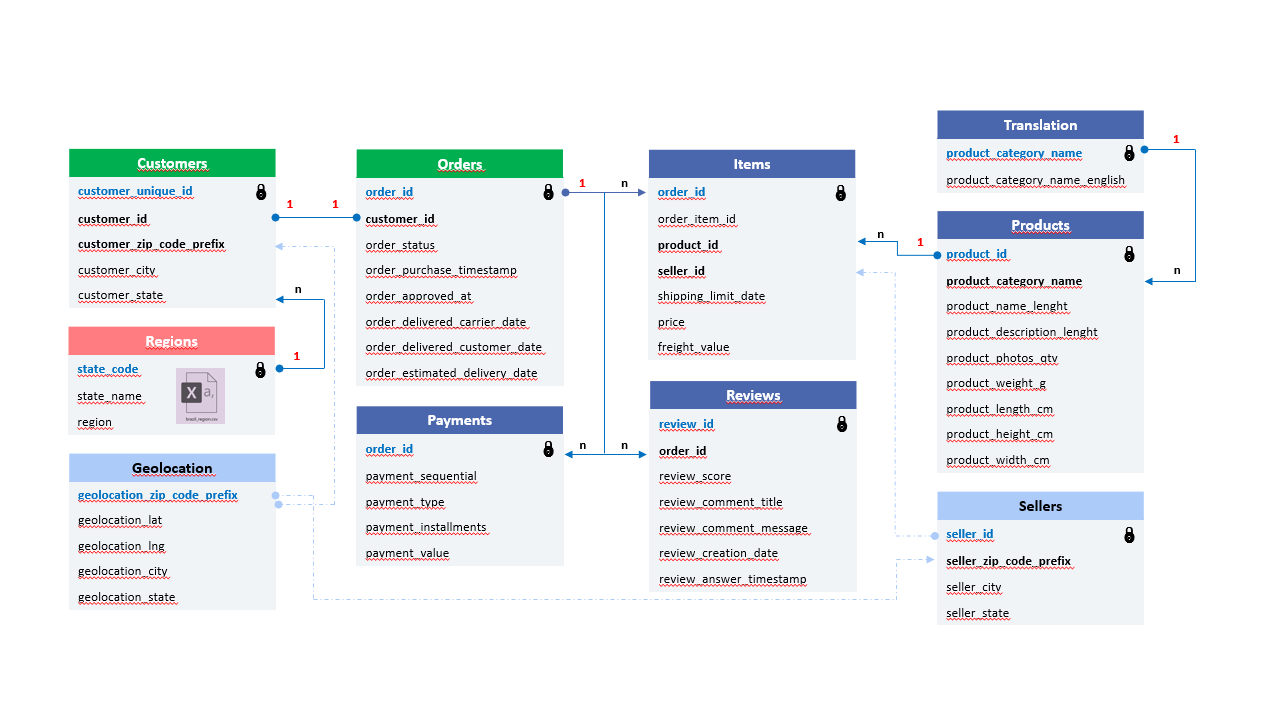

Therefore :
- in **<font color=green>GREEN</font>**, we have the most important information about the **customers**: their unique ID and location, AND their orders ;
- in **<font color=darkblue>DARK BLUE</font>**, we have all orders' details which can use to find similarity or difference about customer behavior during a purchase;
- in **<font color=salmon>PINK</font>**, we have additional information, especially created to aggregate information about customers' location by regions;
- in **<font color=lightblue>LIGHT BLUE</font>**,we don't need the provided information as customer location is already tracked by the main dataset; as well, details about sellers are not really useful for customers segmentation; therefore, **we will not use GEOLOCATION and SELLERS datasets**. 

# <font color=salmon>PART 2 - Datasets preparation</font>

The **OBJECTIVE** of the merging is to create a **<font color=red>master dataframe</font>** in which we can identify **all customers**:
- **who have made at least one (1) order**;
- and **who can be described by usefull characterictics** available on the different datasets provided by OLIST.

We will first create the core ORDERS dataset, including details about items and products, payments and reviews before merging it to CUSTOMERS dataset.

## <font color=blue>2.1 - ITEMS preparation</font>

### <font color=brown>2.1.1 - TRANSLATION</font>

From OLIST explanation, we know that **<font color=red>TRANSLATION</font>** translates the <code>**product_category_name**</code> from portugese to english.

#### View 5 first rows

In [8]:
# Display shape, missing values, 5 first rows
display(Markdown(f'**TRANSLATION dimension: {translation.shape}**'))
display(Markdown(f'**Missing values**: {list(translation.isnull().sum())}'))
translation.head()

**TRANSLATION dimension: (71, 2)**

**Missing values**: [0, 0]

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### Update unique values

We have seen in PART 1.4 that, if <code>**product_category_name**</code> is the key between these PRODUCTS and TRANSLATION table, **PRODUCTS table has 73 unique values while TRANSLATION has 71 unique values**.

Let's have a look at the difference, then.

In [9]:
# Check of difference of unique values before translation
product_tab = set(products.product_category_name.unique())
translation_tab = set(translation.product_category_name.unique())
diff = product_tab ^ translation_tab

if len(diff) > 0 :
    display(Markdown(f'---'))
    display(Markdown(f'**Table differences**: {diff}'))
    display(Markdown(f'---'))

---

**Table differences**: {nan, 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'}

---

We update TRANSLATION table with these 2 missing values (excluding NaN values).

In [10]:
# Append the new values to TRANSLATION
translation = translation.append(
    pd.DataFrame({'product_category_name':
                  ['pc_gamer',
                   'portateis_cozinha_e_preparadores_de_alimentos'],
                  'product_category_name_english':
                  ['pc_gamer',
                   'cooking_and_food_preparation']}),
    ignore_index=True, verify_integrity=True)

# Rename the column for clarity
translation.rename(
    columns={'product_category_name_english':'main_product'},
    inplace=True)

# Display new unique values and 5 last rows
display(Markdown(
    f'**Product unique values**: {translation.main_product.nunique()}'))
translation.tail()

**Product unique values**: 73

,product_category_name,main_product
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services
71,pc_gamer,pc_gamer
72,portateis_cozinha_e_preparadores_de_alimentos,cooking_and_food_preparation


#### Create main categories of product

73 unique values are a bit too numerous to characterize easily a customer profile: we can group them into **main categories** (this part is subject to personal interpretation).

In [11]:
# Create main categories dictionnary
main_categories_dict = {
    # fashion
    'fashio_female_clothing': 'fashion',
    'fashion_bags_accessories': 'fashion',
    'fashion_childrens_clothes': 'fashion',
    'fashion_male_clothing': 'fashion',
    'fashion_shoes': 'fashion',
    'fashion_sport': 'fashion',
    'fashion_underwear_beach': 'fashion',
    'watches_gifts': 'fashion',
    # tooling
    'construction_tools_construction': 'DIY',
    'construction_tools_lights': 'DIY',
    'construction_tools_safety': 'DIY',
    'costruction_tools_garden': 'DIY',
    'costruction_tools_tools': 'DIY',
    'garden_tools': 'DIY',
    'home_construction': 'DIY',
    'auto':'DIY',
    # sport & leisure
    'sports_leisure':'sport_leisure',
    'art':'sport_leisure',
    'musical_instruments':'sport_leisure',
    'music':'sport_leisure',
    'cds_dvds_musicals':'sport_leisure',
    'cine_photo':'sport_leisure',
    'books_general_interest':'sport_leisure',
    'books_technical':'sport_leisure',
    'books_imported':'sport_leisure',
    'dvds_blu_ray':'sport_leisure',
    'toys':'sport_leisure',
    # home appliances
    'home_appliances': 'appliances',
    'home_appliances_2': 'appliances',
    'small_appliances_home_oven_and_coffee': 'appliances',
    'small_appliances' : 'appliances',
    'air_conditioning': 'appliances',
    # home
    'home_comfort_2': 'home',
    'home_confort': 'home',
    'housewares': 'home',
    'flowers':'home',
    'pet_shop':'home',
    'luggage_accessories':'home',
    # furniture
    'furniture_bedroom': 'furnitures',
    'furniture_decor': 'furnitures',
    'furniture_living_room': 'furnitures',
    'furniture_mattress_and_upholstery': 'furnitures',
    'bed_bath_table': 'furnitures',
    'kitchen_dining_laundry_garden_furniture': 'furnitures',
    'office_furniture': 'furnitures',
    # food & drinks
    'drinks': 'food_drink',
    'food': 'food_drink',
    'food_drink': 'food_drink',
    'la_cuisine': 'food_drink',
    'cooking_and_food_preparation':'food_drink',
    # electronics
    'electronics': 'electronics',
    'audio': 'electronics',
    'tablets_printing_image': 'electronics',
    'telephony': 'electronics',
    'fixed_telephony': 'electronics',
    'computers_accessories': 'electronics',
    'computers': 'electronics',
    'pc_gamer':'electronics',
    'consoles_games':'electronics',
    # health & beauty
    'health_beauty': 'health_beauty',
    'perfumery': 'health_beauty',
    'baby':'health_beauty',
    'diapers_and_hygiene': 'health_beauty',
    # supplies
    'stationery':'supplies',
    'christmas_supplies':'supplies',
    'party_supplies':'supplies',
    'arts_and_craftmanship':'supplies',
    # others (miscellanaous)
    'agro_industry_and_commerce':'misc',
    'industry_commerce_and_business':'misc',
    'market_place':'misc',
    'signaling_and_security':'misc',
    'security_and_services':'misc',
    'cool_stuff':'misc',
    }

# Creation of new variable
translation['main_category'] = translation['main_product'].map(main_categories_dict)

# Print 5 first rows
translation.head()

,product_category_name,main_product,main_category
0,beleza_saude,health_beauty,health_beauty
1,informatica_acessorios,computers_accessories,electronics
2,automotivo,auto,DIY
3,cama_mesa_banho,bed_bath_table,furnitures
4,moveis_decoracao,furniture_decor,furnitures


### <font color=brown>2.1.2 - PRODUCTS with TRANSLATION</font>

From Olist explanation, **<font color=red>PRODUCTS</font>** includes data about the products sold on the marketplaces.

#### View 5 first rows

In [12]:
# Display shape, missing values, 5 first rows
display(Markdown(f'**PRODUCTS dimension : {products.shape}**'))
display(Markdown(
    f'**Missing values**: {list(products.isnull().sum())}'))
products.head()

**PRODUCTS dimension : (32951, 9)**

**Missing values**: [0, 610, 610, 610, 610, 2, 2, 2, 2]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### Merge with TRANSLATION

We have seen that we have product information missing thus, for main categories, we impute missing values with **unknown**.

In [13]:
# Join dataframes
products = pd.merge(products, translation,
                    left_on='product_category_name',
                    right_on='product_category_name',
                    how='left')

# Set variables for join check
left_df = products
left_key = 'product_category_name'
right_df = translation
right_key = 'product_category_name'

# Call merge check function
merge_check(left_df, left_key, right_df, right_key)

# Impute missing values
products['main_category'] = products['main_category'].fillna('unknown')

# Drop useless features
products = products.drop(columns=['product_category_name',
                                  'product_name_lenght',
                                  'product_description_lenght',
                                  'product_photos_qty',
                                  'product_weight_g',
                                  'product_length_cm',
                                  'product_height_cm',
                                  'product_width_cm',
                                  'main_product'])

# Display shape, missing values, 5 first rows
display(Markdown(f'**PRODUCTS dimension : {products.shape}**'))
display(Markdown(
    f'**Missing values**: {list(products.isnull().sum())}'))
products.head()

Number of common values: '73'
Unique values 'product_category_name' not in RIGHT : 1
Unique values 'product_category_name' not in LEFT : 0
Exclusive rows of LEFT on product_category_name : 610


**PRODUCTS dimension : (32951, 2)**

**Missing values**: [0, 0]

,product_id,main_category
0,1e9e8ef04dbcff4541ed26657ea517e5,health_beauty
1,3aa071139cb16b67ca9e5dea641aaa2f,sport_leisure
2,96bd76ec8810374ed1b65e291975717f,sport_leisure
3,cef67bcfe19066a932b7673e239eb23d,health_beauty
4,9dc1a7de274444849c219cff195d0b71,home


### <font color=brown>2.1.3 - ITEMS with PRODUCTS</font>

From Olist explanation, **<font color=red>ITEMS</font>** includes data about the items purchased within each order.

Thus, this is where we can see the **number of purchased items per order**, and also the **price of the products**.

#### View 5 first rows

In [14]:
# Display shape, missing values, 5 first rows
display(Markdown(f'**ITEMS dimension : {items.shape}**'))
display(Markdown(
    f'**Missing values**: {list(items.isnull().sum())}'))
items.head()

**ITEMS dimension : (112650, 7)**

**Missing values**: [0, 0, 0, 0, 0, 0, 0]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


From PART 1.4 of this notebook, we have seen that ITEMS table has **98,666 unique orders**, but the **number of rows is 112,650** : that means that we have more that one items per order.

Indeed, Olist provides the following information for <code>**order_item_id**</code>: it is a sequential number identifying number of items included in the same order.

Therefore, we need to group by <code>**order_id**</code> and properly aggregated all features. 

First, we will **merge** the ITEMS dataset to PRODUCTS dataset; after that, we will **group by** order ID.

#### Merge with PRODUCTS

In [15]:
# Join dataframes
items = pd.merge(items, products,
                 left_on='product_id',
                 right_on='product_id',
                 how='left')

# Set variables for join check
left_df = items
left_key = 'product_id'
right_df = products
right_key = 'product_id'

# Call merge check function
merge_check(left_df, left_key, right_df, right_key)

# Display shape, missing values, 5 first rows
display(Markdown(f'**ITEMS dimension : {items.shape}**'))
display(Markdown(
    f'**Missing values**: {list(items.isnull().sum())}'))
items.head()

Number of common values: '32951'
Unique values 'product_id' not in RIGHT : 0
Unique values 'product_id' not in LEFT : 0
Exclusive rows of LEFT on product_id : 0


**ITEMS dimension : (112650, 8)**

**Missing values**: [0, 0, 0, 0, 0, 0, 0, 0]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,main_category
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,misc
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,home
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furnitures
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,health_beauty
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,DIY


#### Group by order_id

In [16]:
# Group by orders ID
# result : 1 row per order
agg_items_dict = {'main_category': 'first',
                  'order_item_id':'max',
                  'price':'mean'}

gp_items = pd.DataFrame(
    items.groupby('order_id',
                  as_index=False).agg(agg_items_dict))

# Rename feature for clarity
gp_items.rename(columns={'order_item_id':'nb_items',
                         'price':'product_price'},
                inplace=True)

# Display shape, missing values, 5 first rows
display(Markdown(f'**ITEMS dimension : {gp_items.shape}**'))
display(Markdown(
    f'**Missing values**: {list(gp_items.isnull().sum())}'))
gp_items.head()

**ITEMS dimension : (98666, 4)**

**Missing values**: [0, 0, 0, 0]

,order_id,main_category,nb_items,product_price
0,00010242fe8c5a6d1ba2dd792cb16214,misc,1,58.90
1,00018f77f2f0320c557190d7a144bdd3,home,1,239.90
2,000229ec398224ef6ca0657da4fc703e,furnitures,1,199.00
3,00024acbcdf0a6daa1e931b038114c75,health_beauty,1,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,DIY,1,199.90


ITEMS dataset is ready to be merged with ORDERS dataset!

## <font color=blue>2.2 - PAYMENTS preparation</font>

### <font color=brown>2.2.1 - Feature analysis</font>

From Olist explanation, **<font color=red>PAYMENTS</font>** includes data about the orders payment options.

#### View 5 first rows

In [17]:
# Display shape, missing values, 5 first rows
display(Markdown(f'**PAYMENTS dimension : {payments.shape}**'))
display(Markdown(
    f'**Missing values**: {list(payments.isnull().sum())}'))
payments.head()

**PAYMENTS dimension : (103886, 5)**

**Missing values**: [0, 0, 0, 0, 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


From PART 1.4 of this notebook, we have seen that PAYMENTS table has **99400 unique orders**, but the **number of rows is 103,886** : that means that we have more paiements than orders, thus, some rows are duplicated, for some reasons.

If we go in depth, Olist provides the following information for <code>**payment_sequential**</code> : a customer may pay an order with more than one payment method ; if he does so, a sequence will be created to accommodate all payments.

Let's look at this feature in detail.

#### Analyze feature: payment_sequential

In [18]:
payments.payment_sequential.describe()

count    103886.000000
mean          1.092679
std           0.706584
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          29.000000
Name: payment_sequential, dtype: float64

We have searched for an example to analyse the impact of a sequential payment on orders with one order ID : **fedcd9f7ccdc8cba3a18defedd1a5547**

In [19]:
# Use mask with feature value
payments[payments.order_id == 'fedcd9f7ccdc8cba3a18defedd1a5547']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
7548,fedcd9f7ccdc8cba3a18defedd1a5547,15,voucher,1,10.66
9665,fedcd9f7ccdc8cba3a18defedd1a5547,1,credit_card,1,1.67
14352,fedcd9f7ccdc8cba3a18defedd1a5547,9,voucher,1,5.30
15264,fedcd9f7ccdc8cba3a18defedd1a5547,11,voucher,1,8.42
15930,fedcd9f7ccdc8cba3a18defedd1a5547,8,voucher,1,31.43
18175,fedcd9f7ccdc8cba3a18defedd1a5547,14,voucher,1,7.63
27087,fedcd9f7ccdc8cba3a18defedd1a5547,2,voucher,1,7.76
32396,fedcd9f7ccdc8cba3a18defedd1a5547,13,voucher,1,5.84
35657,fedcd9f7ccdc8cba3a18defedd1a5547,19,voucher,1,8.42
36869,fedcd9f7ccdc8cba3a18defedd1a5547,5,voucher,1,9.76


For one order, if we want to keep track of all sequences, we need to group the dataset by <code>**order_id**</code> and just keep the **max** of sequences, otherwise we will have as many duplicates as the number of payment sequences.

However, we should be careful about the impact on the other features: here, we can see that we should take the **sum** for payment value.

#### Analyse feature: payment_type

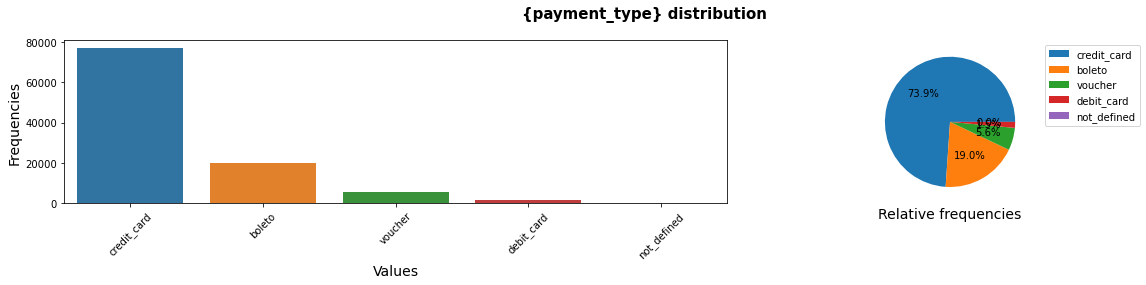

In [20]:
# Call function to plot distribution
bar_and_pie_plot(payments, 'payment_type',
                 figsize=(18, 4), categorical=True)

In [21]:
# Group by specific attributes
(payments.loc[:, ['payment_type',
                  'payment_sequential']
             ].groupby('payment_type').mean()).round(2)

,payment_sequential
payment_type,
boleto,1.00
credit_card,1.00
debit_card,1.03
not_defined,1.00
voucher,2.60


We can see that 74% of payments are done with Credit card and Sequential payment are done mainly with Voucher.

These information are too specific because they are linked to payment type, and may not be relevant in customer segmentation. We will focus only on **payment installments** and **payment_value**.

#### Analyse feature: payment_installments

In [22]:
# Display basic statistics
payments.payment_installments.describe()

count    103886.000000
mean          2.853349
std           2.687051
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64

In [23]:
# Group by specific attributes
(payments.loc[:, ['payment_type',
                  'payment_installments']
             ].groupby('payment_type').mean()).round(2)

,payment_installments
payment_type,
boleto,1.00
credit_card,3.51
debit_card,1.00
not_defined,1.00
voucher,1.00


Only orders paid with Credit Card have payment installments. 

We can conclude that payment type can be guessed through payment installments, which is a very interesting customer behavior that Olist can target through communication customers.

### <font color=brown>2.2.2 - Features selection</font>

As conclusion, we keep only payment value and payment installments details.

#### Group by order_id

In [24]:
# Group by orders ID
# result : 1 row per order
agg_payment_dict = {'payment_value':'sum',
                    'payment_installments':'max'}

gp_payments = pd.DataFrame(
    payments.groupby('order_id',
                     as_index=False).agg(agg_payment_dict))

# Display shape, missing values, 5 first rows
display(Markdown(f'**PAYMENTS dimension : {gp_payments.shape}**'))
display(Markdown(
    f'**Missing values**: {list(gp_payments.isnull().sum())}'))
gp_payments.head()

**PAYMENTS dimension : (99440, 3)**

**Missing values**: [0, 0, 0]

,order_id,payment_value,payment_installments
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,2
1,00018f77f2f0320c557190d7a144bdd3,259.83,3
2,000229ec398224ef6ca0657da4fc703e,216.87,5
3,00024acbcdf0a6daa1e931b038114c75,25.78,2
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,3


Grouped PAYMENTS dataset is ready to be merged with ORDERS dataset!

## <font color=blue>2.3 - REVIEWS preparation</font>

From Olist explanation, **<font color=red>REVIEWS</font>** includes data about the reviews made by the customers.

After a customer purchases the product from Olist Store, a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

### <font color=brown>2.3.1 - Data structure analysis</font>

#### View 5 first rows

In [25]:
# Display shape, missing values, 5 first rows
display(Markdown(f'**REVIEWS dimension : {reviews.shape}**'))
display(Markdown(
    f'**Missing values**: {list(reviews.isnull().sum())}'))
reviews.head()

**REVIEWS dimension : (100000, 7)**

**Missing values**: [0, 0, 0, 88285, 58247, 0, 0]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


We observe that we have **100,000 rows of reviews**, **99,173 unique reviews ID** and **99,441 unique orders ID**: that means we have duplicates somewhere, whatever the reasons.

#### Find duplicates pattern: review_id, order_id

In [26]:
# Find duplicates
reviews.duplicated(subset=['order_id']).value_counts()

False    99441
True       559
dtype: int64

In [27]:
# Find duplicates
reviews.duplicated(subset=['review_id']).value_counts()

False    99173
True       827
dtype: int64

After some research, we have observed that :
- we can have **same order_id for different review_ids** : the customer has made 2 reviews at different dates for the same order; this can be explained by different steps in the delivery process (delivery, return, new delivery, etc.);
- the other way around, we can also have **same review_id for different order_ids**, which we find hard to explain (could it be linked to the existence of customer_id feature ? Is there something specific in the way reviews are made ?).

### <font color=brown>2.3.2 - Features transformation</font>

For the 1st case, we decide to **keep the last date of reviews**, which should reflect the real evaluation of the purchase by the customer and the final level of satisfaction.

For the 2nd case, we have dropped the duplicates as first option, then we ended up with lots of missing values! Olist really has a specific data stucture: finally, we **DO NOT drop the duplicates** because we are not able to explain precisely why different orders have same review_id!

We note that this issue was mentionned on KAGGLE but without answer from OLIST.

In [28]:
# Change to date format
date_cols = ['review_creation_date',
             'review_answer_timestamp']

for col in date_cols:
    reviews[col] = pd.to_datetime(reviews[col])

# Sort reviews main features
reviews.sort_values(by=['review_id', 'review_answer_timestamp'],
                    ascending=False,
                    inplace=True)

# Drop duplicates on order_id (keep last)
# 1 order -> more than 1 review
reviews = reviews.drop_duplicates(subset='order_id',
                                  keep='last')

# Drop useless features
reviews = reviews.drop(columns=['review_id',
                                'review_comment_title',
                                'review_comment_message',
                                'review_creation_date',
                                'review_answer_timestamp'])

# Display shape, missing values, 5 first rows
display(Markdown(f'**REVIEWS dimension : {reviews.shape}**'))
display(Markdown(
    f'**Missing values**: {list(reviews.isnull().sum())}'))
reviews.head()

**REVIEWS dimension : (99441, 2)**

**Missing values**: [0, 0]

,order_id,review_score
47787,1061bc32577c6b8beb107bf1b5a65175,5
10876,9a54562498faf18f39a0e387976e11a5,5
89628,fceb38f42fbf13b53a6253648c8d47cf,1
62113,0efaa1dd18856769a1bcc489004fbe3b,5
31823,4069c489933782af79afcd3a0e4d693c,4


REVIEWS dataset is ready to be merged with ORDERS dataset!

## <font color=blue>2.4 - ORDERS preparation</font>

From Olist explanation, **<font color=red>ORDERS</font>** is the OLIST **core dataset**: from each order, one might find all other information.

### <font color=brown>2.4.1 - Feature analysis</font>

#### View 5 first rows

In [29]:
# Display shape, missing values, 5 first rows
display(Markdown(f'**ORDERS dimension : {orders.shape}**'))
display(Markdown(
    f'**Missing values**: {list(orders.isnull().sum())}'))
orders.head()

**ORDERS dimension : (99441, 8)**

**Missing values**: [0, 0, 0, 0, 160, 1783, 2965, 0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### Drop not relevant features

We can remove all features for which a customer has NO control.

In [30]:
# Drop useless features
orders = orders.drop(columns=['order_approved_at',
                              'order_delivered_carrier_date',
                              'order_delivered_customer_date',
                              'order_estimated_delivery_date'])

# Display shape, missing values, 5 first rows
display(Markdown(f'**ORDERS dimension : {orders.shape}**'))
display(Markdown(
    f'**Missing values**: {list(orders.isnull().sum())}'))
orders.head()

**ORDERS dimension : (99441, 4)**

**Missing values**: [0, 0, 0, 0]

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39


#### Analyze order_status

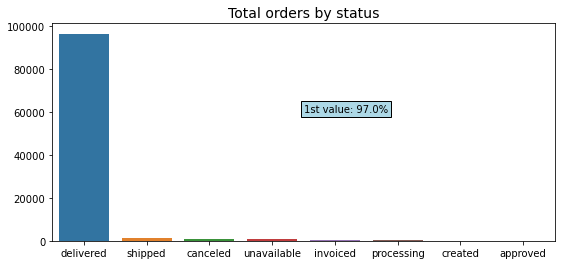

In [31]:
plt.figure(figsize=(9, 4))

var = orders.order_status
sns.barplot(x=var.value_counts().index,
            y=var.value_counts().values)
text_str = (
    '1st value: {}%'.format(
        round((var.value_counts(
            normalize=True) * 100).nlargest(1).sum(), 0)))
plt.text(3.5, 60000, text_str,
         bbox=dict(boxstyle='square, pad=0.3',
                   fc='lightblue'))
plt.ylabel('')
plt.xlabel('')
plt.title('Total orders by status', fontsize=14)
plt.show()

**97%** of orders concerned the delivered ones, then, we will filter our dataframe on this status as even REVIEWS are linked to delivery.

#### Analyze order_purchase

This feature is **central** as we can 

In [32]:
# Convert to date format, rename feature
orders['order_purchase_timestamp'] = (
    pd.to_datetime(orders['order_purchase_timestamp'],
                   format='%Y-%m-%d'))
orders = (orders.rename(
    columns={'order_purchase_timestamp':'purchase_date'}))

# Create new features
# https://strftime.org/
orders['purchase_year_month'] = (
    orders.purchase_date.apply(lambda x: x.strftime('%Y%m')))
orders['purchase_hour'] = (
    orders.purchase_date.apply(lambda x: x.hour))

# Display shape, missing values, 5 first rows
display(Markdown(f'**ORDERS dimension : {orders.shape}**'))
display(Markdown(
    f'**Missing values**: {list(orders.isnull().sum())}'))
orders.head()

**ORDERS dimension : (99441, 6)**

**Missing values**: [0, 0, 0, 0, 0, 0]

,order_id,customer_id,order_status,purchase_date,purchase_year_month,purchase_hour
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,201710,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,201807,20
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,201808,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,201711,19
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,201802,21


Let's look at the general trends of Olist sales per month.

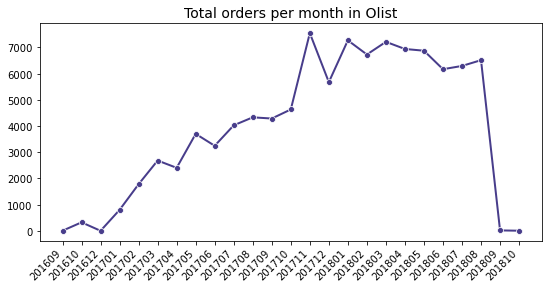

In [33]:
plt.figure(figsize=(9, 4))

# Plot total orders trends
values = orders['purchase_year_month'].value_counts().sort_index()
sns.lineplot(data=values, color='darkslateblue',
             marker='o', linewidth=2)
year_month_label = values.index
plt.xticks(year_month_label, rotation=45, ha='right')
plt.ylabel('')
plt.title('Total orders per month in Olist', fontsize=14)

plt.show()

Olist has growing sales trends, with a peak on November 2017, but on September 2018, we have sharp drop.

Besides, year 2016 has only 270 orders, only 1 for September and December, and November is missing.

For the sake of consistency, **we will exclude these periods from the dataset (year 2016 and September/October 2018)**.

### <font color=brown>2.4.2 - Data selection</font>

#### Apply filters

In [34]:
# Filter on date and delivered orders
orders = (
    orders.query(
        "purchase_date >= '2017-01-01' & purchase_date <= '2018-08-31'"))
orders = orders[orders.order_status == 'delivered']

# Display min/max values
display(Markdown(f'**Order date min**: {orders.purchase_date.min()}'))
display(Markdown(f'**Order date max**: {orders.purchase_date.max()}'))

**Order date min**: 2017-01-05 11:56:06

**Order date max**: 2018-08-29 15:00:37

#### Create or drop features

In [35]:
# Drop useless features
orders = orders.drop(columns=['order_status',
                              'purchase_year_month'])

# Display shape, missing values, 5 first rows
display(Markdown(f'**ORDERS dimension : {orders.shape}**'))
display(Markdown(
    f'**Missing values**: {list(orders.isnull().sum())}'))
orders.head()

**ORDERS dimension : (96211, 4)**

**Missing values**: [0, 0, 0, 0]

,order_id,customer_id,purchase_date,purchase_hour
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,20
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,19
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,21


In [36]:
# Display info
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96211 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       96211 non-null  object        
 1   customer_id    96211 non-null  object        
 2   purchase_date  96211 non-null  datetime64[ns]
 3   purchase_hour  96211 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.7+ MB


ORDERS dataset is ready to be merged with CUSTOMERS dataset!

## <font color=blue>2.5 - CUSTOMERS preparation</font>

From Olist explanation, **<font color=red>CUST</font>** has information about the **customer and its location**.

At OLIST system, each order is assigned to a <code>**customer_id**</code>: this means that the same customer will get different IDs for different orders. 

The purpose of having a <code>**customer_unique_id**</code> on the dataset is to identify customers that made repurchases at the store. Otherwise, you would find that each order had a different customer associated with.

Thus, **<code><font color=red>customer_unique_id</font></code> <font color=blue>is unique identifier of a customer AND the most important key to achieve our goal : customer segmentation</font>**.

### <font color=brown>2.5.1 - Feature selection</font>

#### View 5 first rows

In [37]:
# Display NAN values, dimension and 5 first rows
display(Markdown(f'**CUSTOMERS dimension : {customers.shape}**'))
display(Markdown(
    f'**Missing values**: {list(customers.isnull().sum())}'))
customers.head()

**CUSTOMERS dimension : (99441, 5)**

**Missing values**: [0, 0, 0, 0, 0]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Drop not relevant features

From PART 1.4, we know that customers zip code counts for 14,994 unique values, city for 4,119 values and state for 27 values.

If we want to segment our customers, using zip code or city is not relevant because they don't characterize enough our customers' profile.

Therefore, **we just keep <code>customer_state</code> as its location details**.

In [38]:
# Drop useless features
customers = customers.drop(columns=['customer_zip_code_prefix',
                                    'customer_city'])

# Display NAN values, dimension and 5 first rows
display(Markdown(f'**CUSTOMERS dimension : {customers.shape}**'))
display(Markdown(
    f'**Missing values**: {list(customers.isnull().sum())}'))
customers.head()

**CUSTOMERS dimension : (99441, 3)**

**Missing values**: [0, 0, 0]

,customer_id,customer_unique_id,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,SP


### <font color=brown>2.4.2 - CUSTOMERS with REGIONS</font>

#### View 5 first rows

In [39]:
# Display shape, missing values, 5 first rows
display(Markdown(f'**REGIONS dimension : {regions.shape}**'))
display(Markdown(
    f'**Missing values**: {list(regions.isnull().sum())}'))
regions.head()

**REGIONS dimension : (27, 3)**

**Missing values**: [0, 0, 0]

,state_code,state_name,region
0,AC,acre,north
1,AL,alagoas,northEast
2,AP,amapa,north
3,AM,amazonas,north
4,BA,bahia,northEast


#### Explain regions info

Based on [Wikipedia](https://en.wikipedia.org/wiki/Brazil) details, a specific CSV file has been created to add CUSTOMERS dataframe with relevant information on **regions**, linked to states information :

**<center>Brazil regions</center>**

| Regions | States |
| :--- | :--- |
| North | **AC** (Acre), **AP** (Amapa), **AM** (Amazonas), **PA** (Para), **RO** (Rondonia), **RR** (Roraima), **TO** (Tocantins) |
| NorthEast | **AL** (Alagoas), **BA** (Bahia), **CE** (Ceara), **MA** (Maranhao), **PB** (Paraiba), **PE** (Pernambuco), **PI** (Piaui), **RN** (Rio Grande Do Norte), **SE** (Sergipe) |
| CenterWest | **DF** (Distrito Federal), **GO** (Goias), **MT** (Mato Grosso), **MS** (Mato Grosso Do Sul) |
| SouthEast | **ES** (Espirito Santo), **MG** (Minas Gerais), **RJ** (Rio De Janiero), **SP** (Sao Paulo) |
| South | **PR** (Parana), **RS** (Rio Grande Del Sul), **SC** (Santa Catarina) |

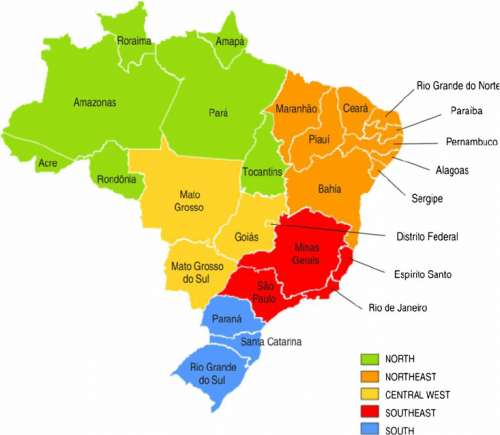

#### Merge with REGIONS

In [40]:
# Join dataframes
customers = pd.merge(customers, regions,
                     left_on='customer_state',
                     right_on='state_code',
                     how='left')

# Set variables for join check
left_df = customers
left_key = 'customer_state'
right_df = regions
right_key = 'state_code'

# Call merge check function
merge_check(left_df, left_key, right_df, right_key)

# Rename the column / Change format
customers = customers.rename(columns={'region':'customer_region'})
customers['customer_region'] = customers.customer_region.str.title()

# Drop useless features
customers = customers.drop(columns=['customer_state',
                                    'state_code',
                                    'state_name'])

# Display NAN values, dimension and 5 first rows
display(Markdown(f'**CUSTOMERS dimension : {customers.shape}**'))
display(Markdown(
    f'**Missing values**: {list(customers.isnull().sum())}'))
customers.head()

Number of common values: '27'
Unique values 'customer_state' not in RIGHT : 0
Unique values 'state_code' not in LEFT : 0
Exclusive rows of LEFT on customer_state : 0


**CUSTOMERS dimension : (99441, 3)**

**Missing values**: [0, 0, 0]

,customer_id,customer_unique_id,customer_region
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,Southeast
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,Southeast
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,Southeast
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,Southeast
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,Southeast


CUSTOMERS dataset is ready for merging!

# <font color=salmon>PART 3 - Datasets merging</font>

## <font color=blue>3.1 - CUSTOMERS and ORDERS</font>

In [41]:
# Join dataframes : inner join
customers = pd.merge(customers, orders,
                     left_on='customer_id',
                     right_on='customer_id')

# Set variables for join check
left_df = customers
left_key = 'customer_id'
right_df = orders
right_key = 'customer_id'

# Call merge check function
merge_check(left_df, left_key, right_df, right_key)

# Drop useless features
customers = customers.drop(columns=['customer_id'])

# Display NAN values, dimension and 5 first rows
display(Markdown(f'**CUSTOMERS dimension : {customers.shape}**'))
display(Markdown(
    f'**Missing values**: {list(customers.isnull().sum())}'))
customers.head()

Number of common values: '96211'
Unique values 'customer_id' not in RIGHT : 0
Unique values 'customer_id' not in LEFT : 0
Exclusive rows of LEFT on customer_id : 0


**CUSTOMERS dimension : (96211, 5)**

**Missing values**: [0, 0, 0, 0, 0]

,customer_unique_id,customer_region,order_id,purchase_date,purchase_hour
0,861eff4711a542e4b93843c6dd7febb0,Southeast,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,15
1,290c77bc529b7ac935b93aa66c333dc3,Southeast,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,20
2,060e732b5b29e8181a18229c7b0b2b5e,Southeast,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,16
3,259dac757896d24d7702b9acbbff3f3c,Southeast,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,16
4,345ecd01c38d18a9036ed96c73b8d066,Southeast,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,9


## <font color=blue>3.2 - CUSTOMERS and ITEMS</font>

In [42]:
# Join dataframes
customers = pd.merge(customers, gp_items,
                     left_on='order_id',
                     right_on='order_id',
                     how='left')

# Set variables for join check
left_df = customers
left_key = 'order_id'
right_df = gp_items
right_key = 'order_id'

# Call merge check function
merge_check(left_df, left_key, right_df, right_key)

# Display NAN values, dimension and 5 first rows
display(Markdown(f'**CUSTOMERS dimension : {customers.shape}**'))
display(Markdown(
    f'**Missing values**: {list(customers.isnull().sum())}'))
customers.head()

Number of common values: '96211'
Unique values 'order_id' not in RIGHT : 0
Unique values 'order_id' not in LEFT : 2455
Exclusive rows of LEFT on order_id : 0


**CUSTOMERS dimension : (96211, 8)**

**Missing values**: [0, 0, 0, 0, 0, 0, 0, 0]

,customer_unique_id,customer_region,order_id,purchase_date,purchase_hour,main_category,nb_items,product_price
0,861eff4711a542e4b93843c6dd7febb0,Southeast,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,15,furnitures,1,124.99
1,290c77bc529b7ac935b93aa66c333dc3,Southeast,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,20,home,1,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,Southeast,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,16,furnitures,1,139.94
3,259dac757896d24d7702b9acbbff3f3c,Southeast,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,16,furnitures,1,149.94
4,345ecd01c38d18a9036ed96c73b8d066,Southeast,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,9,home,1,230.00


## <font color=blue>3.3 - CUSTOMERS and PAYMENTS</font>

In [43]:
# Join dataframes
customers = pd.merge(customers, gp_payments,
                     left_on='order_id',
                     right_on='order_id',
                     how='left')

# Set variables for join check
left_df = customers
left_key = 'order_id'
right_df = gp_payments
right_key = 'order_id'

# Call merge check function
merge_check(left_df, left_key, right_df, right_key)

# Display NAN values, dimension and 5 first rows
display(Markdown(f'**CUSTOMERS dimension : {customers.shape}**'))
display(Markdown(
    f'**Missing values**: {list(customers.isnull().sum())}'))
customers.head()

Number of common values: '96211'
Unique values 'order_id' not in RIGHT : 0
Unique values 'order_id' not in LEFT : 3229
Exclusive rows of LEFT on order_id : 0


**CUSTOMERS dimension : (96211, 10)**

**Missing values**: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

,customer_unique_id,customer_region,order_id,purchase_date,purchase_hour,main_category,nb_items,product_price,payment_value,payment_installments
0,861eff4711a542e4b93843c6dd7febb0,Southeast,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,15,furnitures,1,124.99,146.87,2
1,290c77bc529b7ac935b93aa66c333dc3,Southeast,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,20,home,1,289.00,335.48,8
2,060e732b5b29e8181a18229c7b0b2b5e,Southeast,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,16,furnitures,1,139.94,157.73,7
3,259dac757896d24d7702b9acbbff3f3c,Southeast,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,16,furnitures,1,149.94,173.30,1
4,345ecd01c38d18a9036ed96c73b8d066,Southeast,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,9,home,1,230.00,252.25,8


## <font color=blue>3.4 - CUSTOMERS and REVIEWS</font>

In [44]:
# Join dataframes
customers = pd.merge(customers, reviews,
                     left_on='order_id',
                     right_on='order_id',
                     how='left')

# Set variables for join check
left_df = customers
left_key = 'order_id'
right_df = reviews
right_key = 'order_id'

# Call merge check function
merge_check(left_df, left_key, right_df, right_key)

# Display NAN values, dimension and 5 first rows
display(Markdown(f'**CUSTOMERS dimension : {customers.shape}**'))
display(Markdown(
    f'**Missing values**: {list(customers.isnull().sum())}'))
customers.head()

Number of common values: '96211'
Unique values 'order_id' not in RIGHT : 0
Unique values 'order_id' not in LEFT : 3230
Exclusive rows of LEFT on order_id : 0


**CUSTOMERS dimension : (96211, 11)**

**Missing values**: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

,customer_unique_id,customer_region,order_id,purchase_date,purchase_hour,main_category,nb_items,product_price,payment_value,payment_installments,review_score
0,861eff4711a542e4b93843c6dd7febb0,Southeast,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,15,furnitures,1,124.99,146.87,2,4
1,290c77bc529b7ac935b93aa66c333dc3,Southeast,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,20,home,1,289.00,335.48,8,5
2,060e732b5b29e8181a18229c7b0b2b5e,Southeast,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,16,furnitures,1,139.94,157.73,7,5
3,259dac757896d24d7702b9acbbff3f3c,Southeast,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,16,furnitures,1,149.94,173.30,1,5
4,345ecd01c38d18a9036ed96c73b8d066,Southeast,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,9,home,1,230.00,252.25,8,5


## <font color=blue>3.5 - Save as CSV file</font>

In [45]:
# Save data to csv file
customers.to_csv('p5_merged_customers.csv', index=False)

# <font color=salmon>PART 4 - Master dataframe by unique customer</font>

In this part, we will perform the final **groupby** action to have **one row per customer**, and achieve our primary goal, which is, to perform a **<font color=red>customer segmentation</font>** through unsupervised Machine Learning algorithms.

In [46]:
# Display list of columns
customers.columns

Index(['customer_unique_id', 'customer_region', 'order_id', 'purchase_date',
       'purchase_hour', 'main_category', 'nb_items', 'product_price',
       'payment_value', 'payment_installments', 'review_score'],
      dtype='object')

In [47]:
# Display basic statistics
customers.describe()

,purchase_hour,nb_items,product_price,payment_value,payment_installments,review_score
count,96211.000000,96211.000000,96211.000000,96211.000000,96211.000000,96211.000000
mean,14.773311,1.142073,125.199647,159.814111,2.926048,4.143300
std,5.328077,0.538440,189.732377,218.881635,2.711329,1.295813
min,0.000000,1.000000,0.850000,9.590000,0.000000,1.000000
25%,11.000000,1.000000,41.900000,61.880000,1.000000,4.000000
50%,15.000000,1.000000,79.000000,105.280000,2.000000,5.000000
75%,19.000000,1.000000,139.900000,176.260000,4.000000,5.000000
max,23.000000,21.000000,6735.000000,13664.080000,24.000000,5.000000


## <font color=blue>4.1 - Final Groupby</font>

#### Aggregation

In [48]:
%%time

# Round all floats to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

# Group by Customer unique ID
# result : 1 row per customer
main_customers = pd.DataFrame(
    customers.groupby(
        'customer_unique_id',as_index=False
    ).agg(main_region=('customer_region','first'),
          main_category=('main_category','first'),
          purchase_hour=('purchase_hour','mean'),
          min_purchase_date=('purchase_date','min'),
          max_purchase_date=('purchase_date','max'),
          nb_orders=('order_id','count'),
          nb_items=('nb_items','sum'),
          avg_spend=('product_price','mean'),
          ttl_revenue=('payment_value','sum'),
          avg_installments=('payment_installments','mean'),
          avg_review=('review_score','mean')))

# Create new features
hours_bins = [-0.1, 6, 11, 14, 18, 21, 24]
hours_label = ['0-6h', '6-11h', '11h-14h', '14-18h', '18-21h', '21-24h']
main_customers['purchase_time'] = pd.cut(main_customers['purchase_hour'],
                                         hours_bins,
                                         labels=hours_label).astype(object)

main_customers['recency'] = ((
    (main_customers['max_purchase_date'].max() -
     main_customers['max_purchase_date']).dt.days)/30).apply(np.floor)


main_customers['recency'].astype(int)

# Drop useless features
main_customers = main_customers.drop(columns=['purchase_hour'])

# Display shape, missing values, 5 first rows
display(Markdown(f'**MASTER DATAFRAME dimension : {main_customers.shape}**'))
display(Markdown(
    f'**Missing values**: {list(customers.isnull().sum())}'))
main_customers.head()

**MASTER DATAFRAME dimension : (93104, 13)**

**Missing values**: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Wall time: 754 ms


,customer_unique_id,main_region,main_category,min_purchase_date,max_purchase_date,nb_orders,nb_items,avg_spend,ttl_revenue,avg_installments,avg_review,purchase_time,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,Southeast,furnitures,2018-05-10 10:56:27,2018-05-10 10:56:27,1,1,129.90,141.90,8.00,5.00,6-11h,3.00
1,0000b849f77a49e4a4ce2b2a4ca5be3f,Southeast,health_beauty,2018-05-07 11:11:27,2018-05-07 11:11:27,1,1,18.90,27.19,1.00,4.00,6-11h,3.00
2,0000f46a3911fa3c0805444483337064,South,supplies,2017-03-10 21:05:03,2017-03-10 21:05:03,1,1,69.00,86.22,8.00,3.00,18-21h,17.00
3,0000f6ccb0745a6a4b88665a16c9f078,North,electronics,2017-10-12 20:29:41,2017-10-12 20:29:41,1,1,25.99,43.62,4.00,4.00,18-21h,10.00
4,0004aac84e0df4da2b147fca70cf8255,Southeast,electronics,2017-11-14 19:45:42,2017-11-14 19:45:42,1,1,180.00,196.89,6.00,5.00,18-21h,9.00


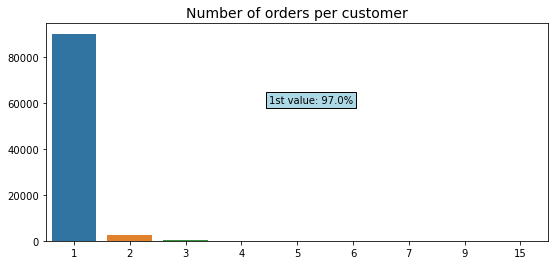

In [49]:
plt.figure(figsize=(9, 4))

var = main_customers.nb_orders
sns.barplot(x=var.value_counts().index,
            y=var.value_counts().values)
text_str = (
    '1st value: {}%'.format(
        round((var.value_counts(
            normalize=True) * 100).nlargest(1).sum(), 0)))
plt.text(3.5, 60000, text_str,
         bbox=dict(boxstyle='square, pad=0.3',
                   fc='lightblue'))
plt.ylabel('')
plt.xlabel('')
plt.title('Number of orders per customer', fontsize=14)
plt.show()

#### Save to CSV file

In [50]:
# Save data to csv file
main_customers.to_csv('p5_grouped_customers.csv', index=False)

## <font color=blue>4.2 - Correlation</font>

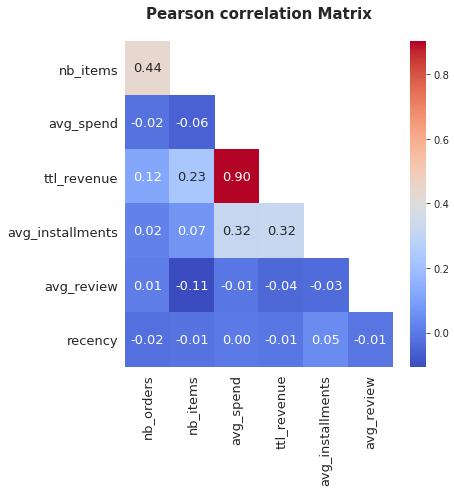

In [51]:
# Call function to plot correlation heatmap
pearson_corr_heatmap(main_customers, mask_upper=True,
                     figsize=(6, 6),
                     font=13, cmap='coolwarm')

It's not a suprise than average price per product is correlated with revenues: thus, **to avoid redundancy, we drop this feature**.

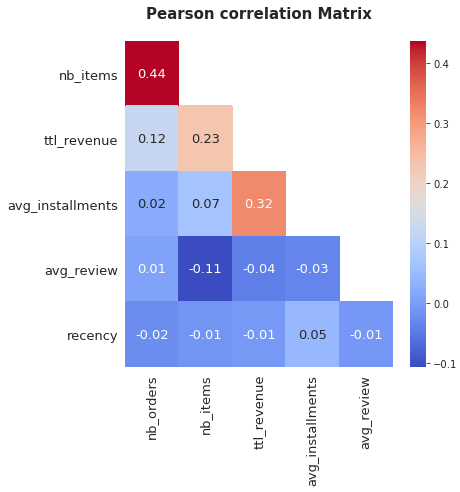

In [52]:
# Drop useless feature
main_customers = main_customers.drop(columns=['avg_spend'])

# Call function to plot correlation heatmap
pearson_corr_heatmap(main_customers, mask_upper=True,
                     figsize=(6, 6),
                     font=13, cmap='coolwarm')

## <font color=blue>4.3 - Final exploration</font>

### <font color=brown>4.3.1 - General info</font>

In [53]:
# Display shape, missing values, 5 first rows
display(Markdown(f'**MASTER DATAFRAME dimension : {main_customers.shape}**'))
display(Markdown(
    f'**Missing values**: {list(customers.isnull().sum())}'))
main_customers.head()

**MASTER DATAFRAME dimension : (93104, 12)**

**Missing values**: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

,customer_unique_id,main_region,main_category,min_purchase_date,max_purchase_date,nb_orders,nb_items,ttl_revenue,avg_installments,avg_review,purchase_time,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,Southeast,furnitures,2018-05-10 10:56:27,2018-05-10 10:56:27,1,1,141.90,8.00,5.00,6-11h,3.00
1,0000b849f77a49e4a4ce2b2a4ca5be3f,Southeast,health_beauty,2018-05-07 11:11:27,2018-05-07 11:11:27,1,1,27.19,1.00,4.00,6-11h,3.00
2,0000f46a3911fa3c0805444483337064,South,supplies,2017-03-10 21:05:03,2017-03-10 21:05:03,1,1,86.22,8.00,3.00,18-21h,17.00
3,0000f6ccb0745a6a4b88665a16c9f078,North,electronics,2017-10-12 20:29:41,2017-10-12 20:29:41,1,1,43.62,4.00,4.00,18-21h,10.00
4,0004aac84e0df4da2b147fca70cf8255,Southeast,electronics,2017-11-14 19:45:42,2017-11-14 19:45:42,1,1,196.89,6.00,5.00,18-21h,9.00


In [54]:
# Display main information
main_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93104 entries, 0 to 93103
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_unique_id  93104 non-null  object        
 1   main_region         93104 non-null  object        
 2   main_category       93104 non-null  object        
 3   min_purchase_date   93104 non-null  datetime64[ns]
 4   max_purchase_date   93104 non-null  datetime64[ns]
 5   nb_orders           93104 non-null  int64         
 6   nb_items            93104 non-null  int64         
 7   ttl_revenue         93104 non-null  float64       
 8   avg_installments    93104 non-null  float64       
 9   avg_review          93104 non-null  float64       
 10  purchase_time       93104 non-null  object        
 11  recency             93104 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(2), object(4)
memory usage: 9.2+ MB


In [55]:
# Display basic statistics
main_customers.describe()

,nb_orders,nb_items,ttl_revenue,avg_installments,avg_review,recency
count,93104.00,93104.00,93104.00,93104.00,93104.00,93104.00
mean,1.03,1.18,165.15,2.91,4.14,7.37
std,0.21,0.62,226.38,2.69,1.29,5.04
min,1.00,1.00,9.59,0.00,1.00,0.00
25%,1.00,1.00,63.04,1.00,4.00,3.00
50%,1.00,1.00,107.78,2.00,5.00,7.00
75%,1.00,1.00,182.50,4.00,5.00,11.00
max,15.00,24.00,13664.08,24.00,5.00,20.00


### <font color=brown>4.3.2 - Categorical features</font>

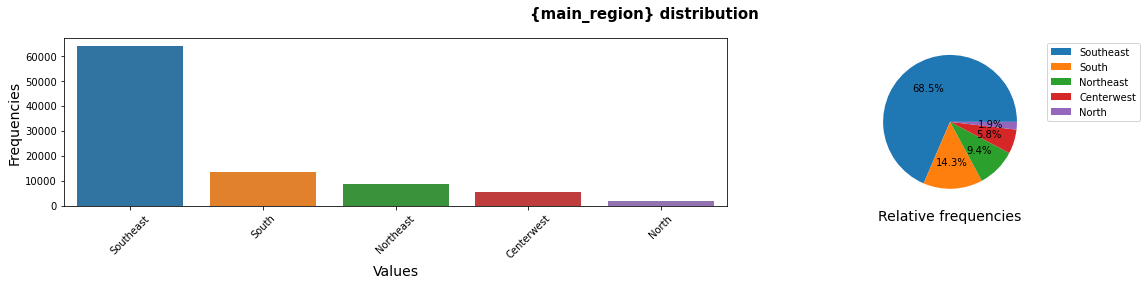

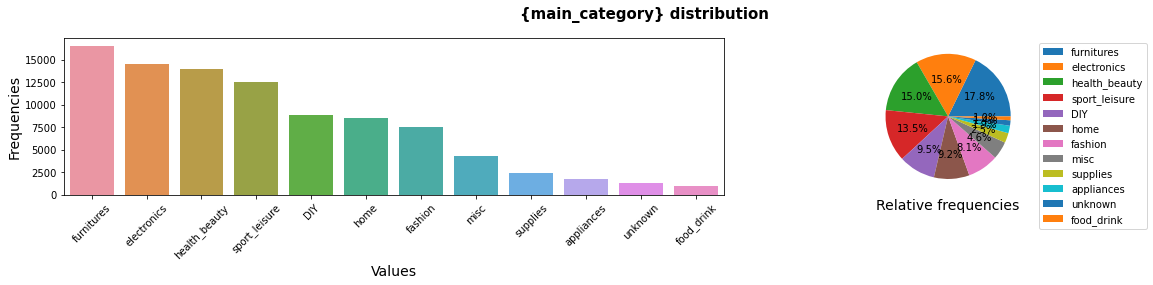

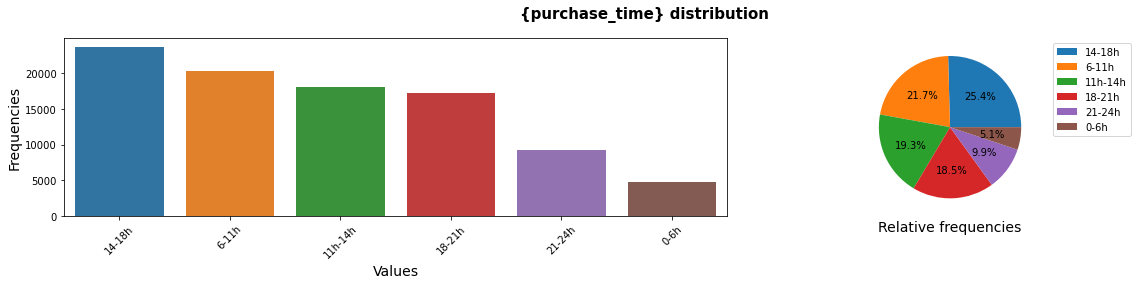

In [56]:
# Set list of categorical features
categorical_features = ['main_region', 'main_category', 'purchase_time']

# Plot bar and pie
for feat in categorical_features:
    bar_and_pie_plot(main_customers, feat,
                     figsize=(18, 4), categorical=True)

### <font color=brown>4.3.3 - Numerical features : with/without outliers</font>

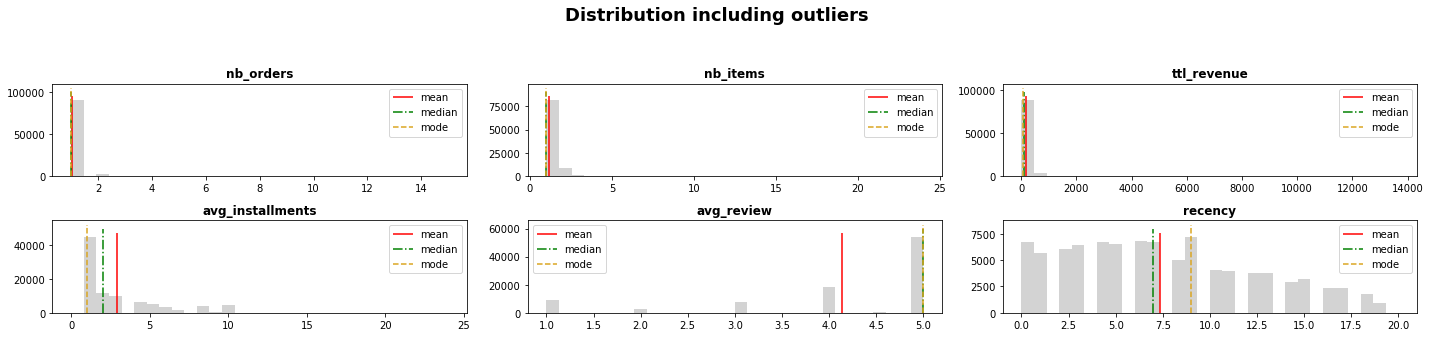

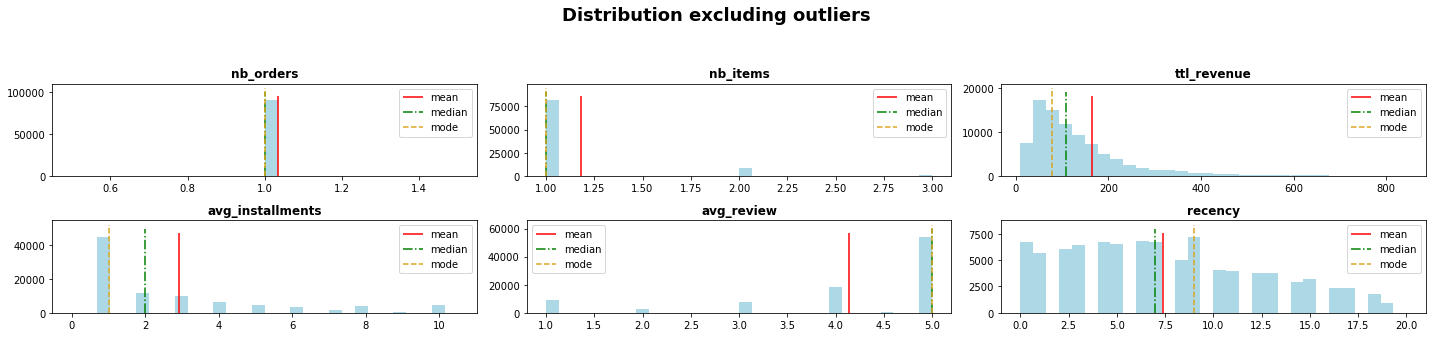

In [57]:
# Filter on numeric columns
numerical_features = main_customers.select_dtypes(include='number').columns

# Plot histograms (including outliers)
plot_histograms(main_customers, numerical_features, bins=30,
                figsize=(20, 6), color='lightgrey',
                skip_outliers=False, z_thresh=3,
                layout=((round(len(numerical_features)//3, 0)+1, 3)))

# Plot histograms (excluding outliers)
plot_histograms(main_customers, numerical_features, bins=30,
                figsize=(20, 6), color='lightblue',
                skip_outliers=True, z_thresh=3,
                layout=((round(len(numerical_features)//3, 0)+1, 3)))

**As outliers can represent a specific customer profile, we do not exclude them at this stage**.

### <font color=brown>4.3.4 - Save to CSV file</font>

We have all the metrics we need to perform a segmentation modeling (clustering).

In [58]:
# Save data to csv file
main_customers.to_csv('p5_cleaned_customers.csv', index=False)